**In this Python Notebook, I have broken down all Google Play Store apps by Category and drawn boxplot charts to generate insights regarding their ratings, sizes, prices, number of reviews and downloads and etc. Besides, I also conducted correlation analysis between all parameters for 32 categories, including family, game, business, medical and etc. Comments was added under each charts and key takeaways can be seen at the end of the page.**

In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import Imputer #tool to replace missing value
import matplotlib.pyplot as plt #plotting charts
import seaborn as sns #plotting good-looking charts
import cufflinks as cf #plotting interative charts
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot 
init_notebook_mode(connected=True) #connect the javescript to the notebook
cf.go_offline() #allow using cufflinks offline


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.



['Clean_googleplaystore.csv']


In [47]:
#Load Cean Data
df = pd.read_csv('../input/Clean_googleplaystore.csv')
del df['Unnamed: 0']

In [48]:
#display the first five records
df.head()

App     ...      Installs_Num
0     Photo Editor & Candy Camera & Grid & ScrapBook     ...                10
1                                Coloring book moana     ...                13
2  U Launcher Lite – FREE Live Cool Themes, Hide ...     ...                15
3                              Sketch - Draw & Paint     ...                17
4              Pixel Draw - Number Art Coloring Book     ...                12

[5 rows x 12 columns]

In [49]:
#delete duplicates
df.drop_duplicates(subset ="App", 
                keep = 'first', inplace = True) 

In [50]:
#check out number of records and attributes
df.shape

(9659, 12)

**2. Explorationary Data Analysis**

**2.1 EDA - Variance by Category**

**2.1.1 EDA - Variance by Category - Price**

Text(0.5,0,'Price')

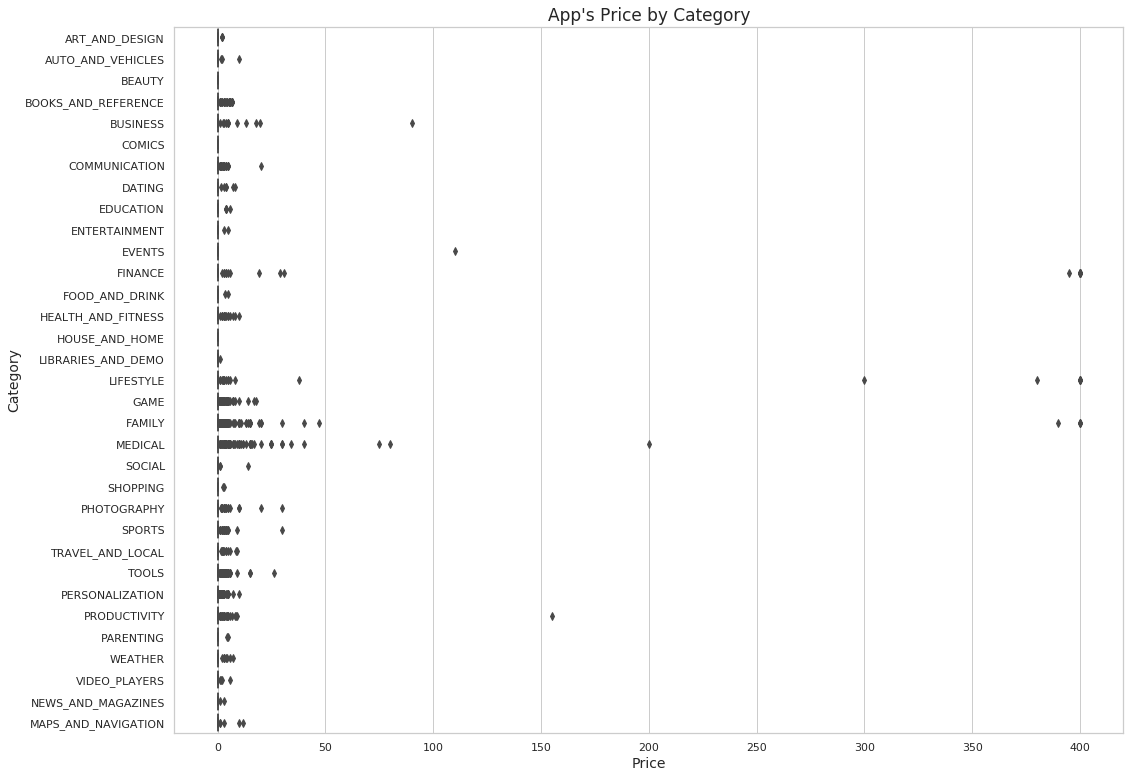

In [51]:
#draw a boxplot map to observe app's price among different categories
sns.set_style('whitegrid')

f, ax = plt.subplots(figsize=(17, 13))
sns.boxplot(x="Price", y="Category", data=df,palette="vlag")
plt.title("App's Price by Category", fontsize = '17')
plt.ylabel('Category',fontsize = '14')
plt.xlabel('Price',fontsize = '14')

In [52]:
#identify apps with extremely high price
df[df.Price>250][['App','Category','Price']]

App   Category   Price
4197             most expensive app (H)     FAMILY  399.99
4362                         💎 I'm rich  LIFESTYLE  399.99
4367           I'm Rich - Trump Edition  LIFESTYLE  400.00
5351                          I am rich  LIFESTYLE  399.99
5354                     I am Rich Plus     FAMILY  399.99
5355                      I am rich VIP  LIFESTYLE  299.99
5356                  I Am Rich Premium    FINANCE  399.99
5357                I am extremely Rich  LIFESTYLE  379.99
5358                         I am Rich!    FINANCE  399.99
5359                 I am rich(premium)    FINANCE  399.99
5362                      I Am Rich Pro     FAMILY  399.99
5364     I am rich (Most expensive app)    FINANCE  399.99
5366                          I Am Rich     FAMILY  389.99
5369                          I am Rich    FINANCE  399.99
5373                 I AM RICH PRO PLUS    FINANCE  399.99
9917                        Eu Sou Rico    FINANCE  394.99
9934  I'm Rich/Eu sou Rico/أنا غني/我很有錢  LIFESTYLE  399.99

In [53]:
#remove outliners
df = df[df.Price<=250]

In [54]:
#check out number of records and attributes
df.shape

(9642, 12)

Text(0.5,0,'Price')

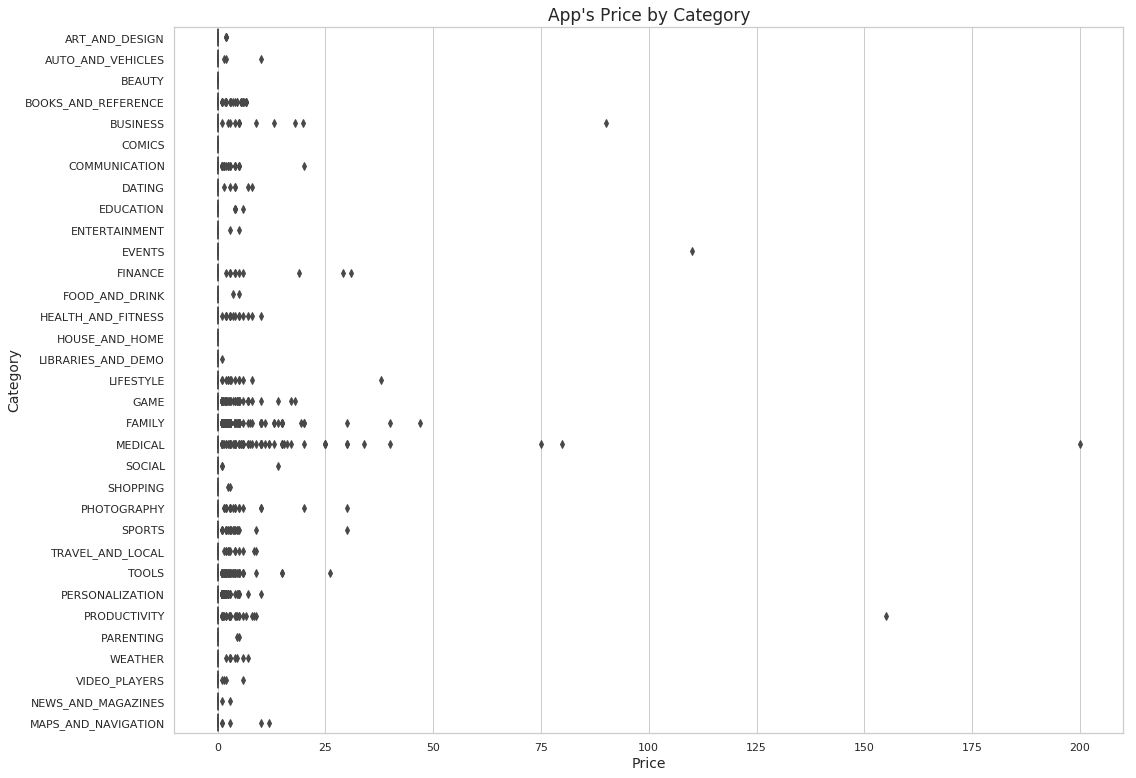

In [55]:
#draw a boxplot map to observe app's price among different categories
sns.set_style('whitegrid')

f, ax = plt.subplots(figsize=(17, 13))
sns.boxplot(x="Price", y="Category", data=df,palette="vlag")
plt.title("App's Price by Category", fontsize = '17')
plt.ylabel('Category',fontsize = '14')
plt.xlabel('Price',fontsize = '14')

In [56]:
#identify these comparably expensive apps
df[df.Price>50]

App     ...      Installs_Num
2253  Vargo Anesthesia Mega App     ...                 8
2390  Language Therapy: Aphasia     ...                 8
6624    BP Fitness Lead Scanner     ...                 2
6692              cronometra-br     ...                 1
9719               EP Cook Book     ...                 1
9730                    Lean EQ     ...                 4

[6 rows x 12 columns]

These 3 apps which has low than 10 Installs and charges over $100, since they are less representitive.

In [57]:
#remove outliners
df = df[df.Price<=100]

Text(0.5,0,'Price')

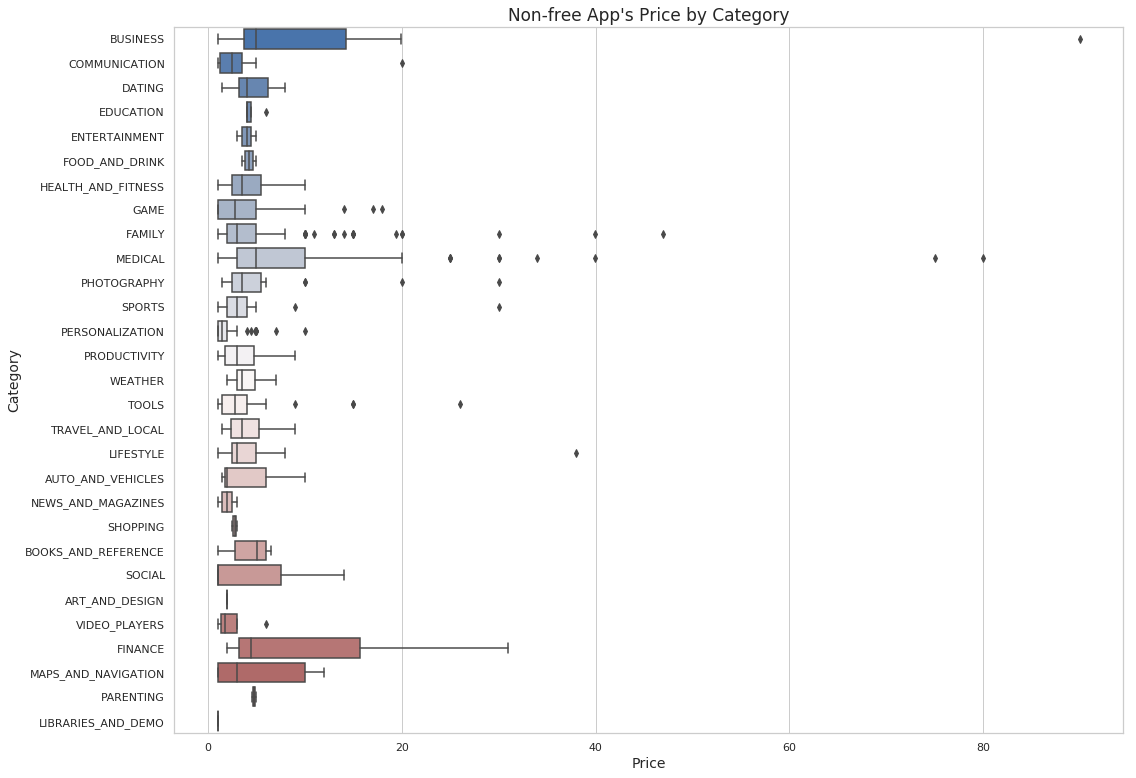

In [58]:
#draw a boxplot map to observe app's price among different categories
sns.set_style('whitegrid')

f, ax = plt.subplots(figsize=(17, 13))
sns.boxplot(x="Price", y="Category", data=df[df.Type =='Paid'],palette="vlag")
plt.title("Non-free App's Price by Category", fontsize = '17')
plt.ylabel('Category',fontsize = '14')
plt.xlabel('Price',fontsize = '14')

**2.1.2 EDA - Variance by Category - Paid vs Free**

In [59]:
#display the Price stats by Category for all paid apps
df[df.Type == 'Paid'].groupby('Category').Price.describe()

count       mean        std  ...      50%      75%    max
Category                                          ...                         
ART_AND_DESIGN         3.0   1.990000   0.000000  ...    1.990   1.9900   1.99
AUTO_AND_VEHICLES      3.0   4.490000   4.769696  ...    1.990   5.9900   9.99
BOOKS_AND_REFERENCE   28.0   4.277500   2.019981  ...    5.045   5.9900   6.49
BUSINESS              12.0  14.607500  24.520126  ...    4.990  14.2400  89.99
COMMUNICATION         27.0   3.079259   3.640282  ...    2.490   3.4900  19.99
DATING                 6.0   4.573333   2.457980  ...    3.990   6.2400   7.99
EDUCATION              4.0   4.490000   1.000000  ...    3.990   4.4900   5.99
ENTERTAINMENT          2.0   3.990000   1.414214  ...    3.990   4.4900   4.99
FAMILY               179.0   4.524581   5.855553  ...    2.990   4.9900  46.99
FINANCE               10.0  10.590000  11.325487  ...    4.490  15.7400  30.99
FOOD_AND_DRINK         2.0   4.240000   1.060660  ...    4.240   4.6150   4.99
GAME                  82.0   3.467195   3.242659  ...    2.740   4.9900  17.99
HEALTH_AND_FITNESS    15.0   4.290000   2.534054  ...    3.490   5.4900   9.99
LIBRARIES_AND_DEMO     1.0   0.990000        NaN  ...    0.990   0.9900   0.99
LIFESTYLE             13.0   6.224615   9.753149  ...    3.040   4.9900  37.99
MAPS_AND_NAVIGATION    5.0   5.390000   5.224940  ...    2.990   9.9900  11.99
MEDICAL               82.0   9.703659  13.522377  ...    4.990   9.9975  79.99
NEWS_AND_MAGAZINES     2.0   1.990000   1.414214  ...    1.990   2.4900   2.99
PARENTING              2.0   4.790000   0.282843  ...    4.790   4.8900   4.99
PERSONALIZATION       81.0   1.857778   1.495543  ...    1.490   1.9900   9.99
PHOTOGRAPHY           19.0   6.225263   7.241010  ...    3.490   5.4900  29.99
PRODUCTIVITY          27.0   3.553333   2.354732  ...    2.990   4.7400   8.99
SHOPPING               2.0   2.740000   0.353553  ...    2.740   2.8650   2.99
SOCIAL                 3.0   5.323333   7.505553  ...    0.990   7.4900  13.99
SPORTS                24.0   4.166667   5.769297  ...    2.990   3.9900  29.99
TOOLS                 78.0   3.426282   3.620792  ...    2.770   3.9900  25.99
TRAVEL_AND_LOCAL      12.0   4.162500   2.512475  ...    3.490   5.2400   8.99
VIDEO_PLAYERS          4.0   2.615000   2.286737  ...    1.740   2.9900   5.99
WEATHER                8.0   4.052500   1.699527  ...    3.490   4.8650   6.99

[29 rows x 8 columns]

* **Medical apps** are more likely to charge people with a **wider range in prices**, which can goes from **0.99 to 79.99 dollars**. It shows people have a **high willingness to pay** recarding healthcare products
* **Finance and Business apps** also charges people with a **wide range in prices** but in a more structual way, came with **less outliners**. It shows Finance and Business app organizers are **more caucious** in setting app price or they may lose repulation for charging insanely high price.

In [60]:
#draw a bar chart showing the number of apps by each category
f, ax = plt.subplots(figsize=(17, 13))
sns.countplot(y="Category", hue ='Type',data=df,palette="Set2")
plt.title("Non-free App's Price by Category", fontsize = '17')
plt.ylabel('Category',fontsize = '14')
plt.xlabel('Price',fontsize = '14')

Text(0.5,0,'Price')

* **Personalization apps** are more likely to charge money.
* It's interesting to see that **all Beauty Apps are free**, and there are only 53 of them. It may because there are too many free comestic channel on Youtube and it doesn't have that big app market compare to others.

In [61]:
df[df.Type == 'Paid'].describe()

Rating       Reviews      ...       Name_Length  Installs_Num
count  736.000000  7.360000e+02      ...        736.000000    736.000000
mean     4.257994  8.949682e+03      ...         22.447011      8.119565
std      0.503631  9.109025e+04      ...          9.959915      2.955792
min      1.000000  0.000000e+00      ...          2.000000      1.000000
25%      4.151875  6.000000e+00      ...         15.000000      6.000000
50%      4.300000  8.750000e+01      ...         22.000000      8.000000
75%      4.600000  1.309000e+03      ...         28.000000     10.000000
max      5.000000  2.376564e+06      ...         50.000000     16.000000

[8 rows x 7 columns]

In [62]:
df.describe()

Rating       Reviews      ...       Name_Length  Installs_Num
count  9639.000000  9.639000e+03      ...       9639.000000   9639.000000
mean      4.175092  2.170410e+05      ...         22.333956     11.170142
std       0.495716  1.833192e+06      ...         12.210287      3.812924
min       1.000000  0.000000e+00      ...          1.000000      0.000000
25%       4.000000  2.500000e+01      ...         13.000000      8.000000
50%       4.200000  9.780000e+02      ...         21.000000     12.000000
75%       4.500000  2.949000e+04      ...         29.000000     14.000000
max       5.000000  7.815831e+07      ...        194.000000     20.000000

[8 rows x 7 columns]

**2.1.3 EDA - Variance by Category - Number of Apps**

In [63]:
'''labels = df.groupby('Category').App.count().index

values = df.groupby('Category').App.count().values

test = pd.DataFrame(values, index=labels, columns=['x'])
 
# make the plot
test.plot(kind='pie', subplots=True, figsize=(8, 8))'''

"labels = df.groupby('Category').App.count().index\n\nvalues = df.groupby('Category').App.count().values\n\ntest = pd.DataFrame(values, index=labels, columns=['x'])\n \n# make the plot\ntest.plot(kind='pie', subplots=True, figsize=(8, 8))"

Text(0.5,0,'Number of Apps')

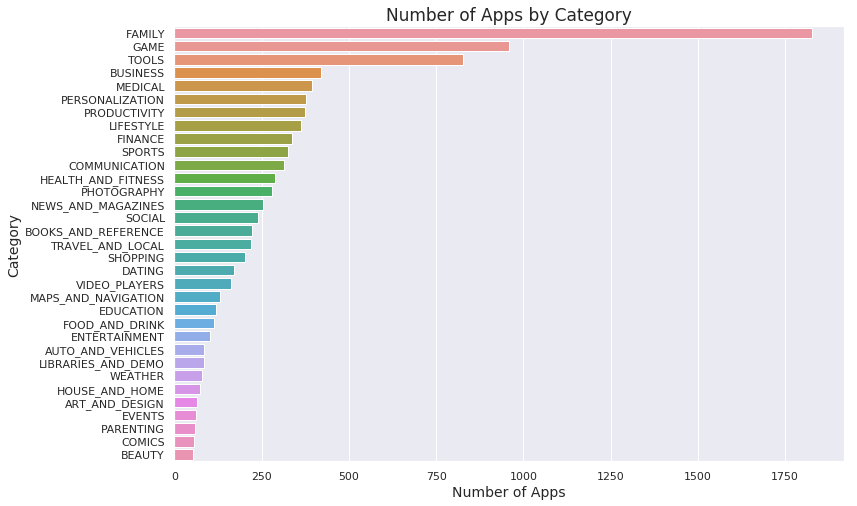

In [64]:
#draw a histogram showing number of apps per category
sns.set_style('whitegrid')
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(y=df['Category'],order = df['Category'].value_counts().index)
plt.title("Number of Apps by Category", fontsize = '17')
plt.ylabel('Category',fontsize = '14')
plt.xlabel('Number of Apps',fontsize = '14')

* **Family, Game, Tool, Business** are the top 4 categories regarding Google Play Store Apps.

**2.1.4 EDA - Variance by Category - Rating**

In [65]:
#draw a boxplot map to observe app's ratings among different categories
f, ax = plt.subplots(figsize=(17, 13))
sns.boxplot(x="Rating", y="Category", data=df,palette="vlag",order = df['Category'].value_counts().index)
plt.title("Boxplot of Ratings by Category", fontsize = '17')
plt.ylabel('Category',fontsize = '14')
plt.xlabel('Rating',fontsize = '14')

Text(0.5,0,'Rating')

* **Most apps** have ratings rangeing from 4.0 - 4.5 out of 5.
* Apps in Communication category show the least variation in rating. It might explained by the developers' frequent maintainance caused by the very frequent user interaction.
* **Business apps** is noted to have most skewed distribution in term of rating, which has a long upper-bound tail. Most apps received score closed to 4.1.
* In most cases, users don't give rating less then 3.

**2.1.5 EDA - Variance by Category - Number of Reviews**

Text(0.5,0,'Number of Reviews')

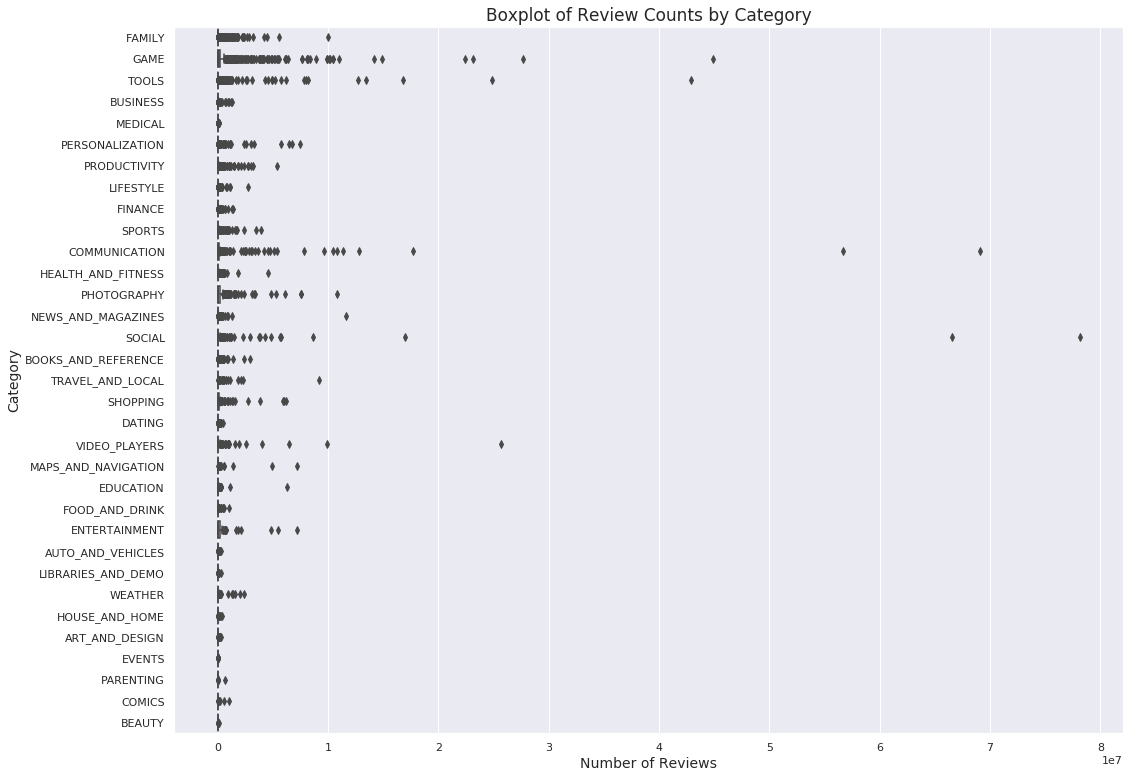

In [66]:
#draw a boxplot map to observe app's review counts among different categories
f, ax = plt.subplots(figsize=(17, 13))
sns.boxplot(x="Reviews", y="Category", data=df,palette="vlag",order = df['Category'].value_counts().index)
plt.title("Boxplot of Review Counts by Category", fontsize = '17')
plt.ylabel('Category',fontsize = '14')
plt.xlabel('Number of Reviews',fontsize = '14')

In [67]:
#display Reviews stats
df.Reviews.describe()

count    9.639000e+03
mean     2.170410e+05
std      1.833192e+06
min      0.000000e+00
25%      2.500000e+01
50%      9.780000e+02
75%      2.949000e+04
max      7.815831e+07
Name: Reviews, dtype: float64

It's necessary to rescale the attribute 'Reviews' for the use of future analysis.

In [68]:
#create a new attribute recording number of reviews after log-scaling
df['Reviews_Log'] = df.Reviews.apply(lambda x:np.log(x+1))

Text(0.5,0,'Number of Reviews (log-scale)')

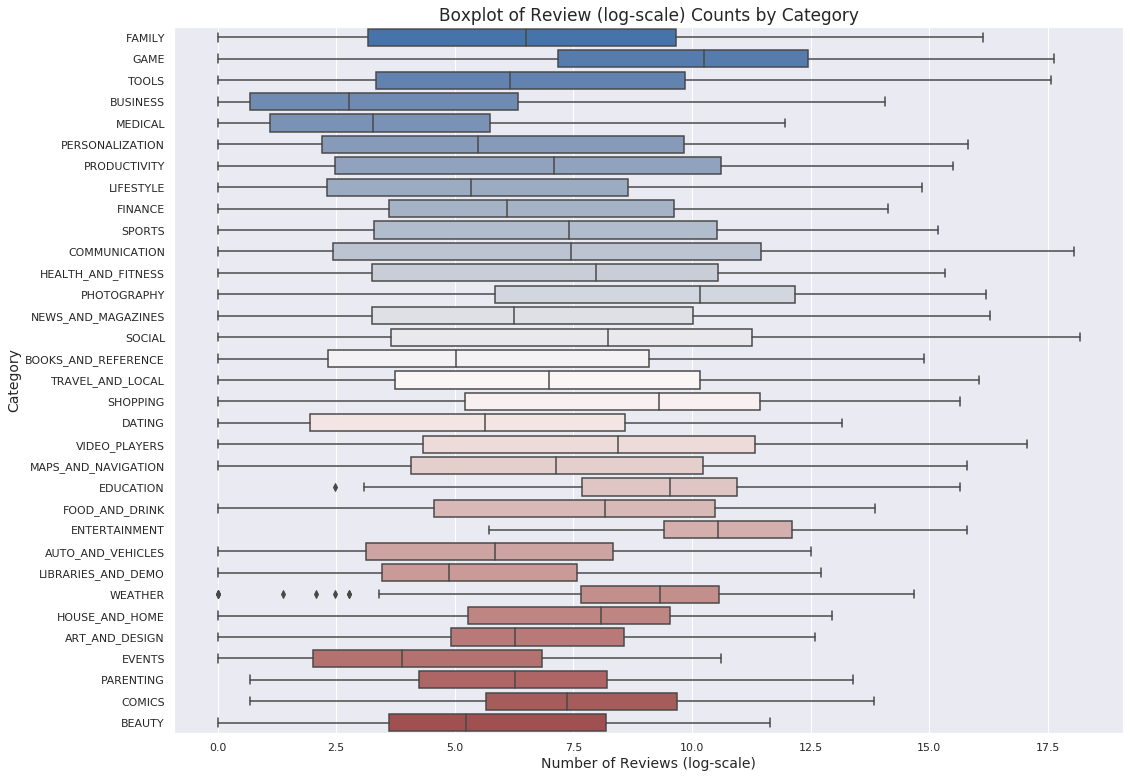

In [69]:
#draw a boxplot map to observe app's review counts (log-scale) among different categories
f, ax = plt.subplots(figsize=(17, 13))
sns.boxplot(x="Reviews_Log", y="Category", data=df,palette="vlag",order = df['Category'].value_counts().index)
plt.title("Boxplot of Review (log-scale) Counts by Category", fontsize = '17')
plt.ylabel('Category',fontsize = '14')
plt.xlabel('Number of Reviews (log-scale)',fontsize = '14')

* **Communication, social, game and tool apps** have the **biggest variable in terms of reviews** received by different apps. This shows that apps in these categories can have very different sizes in user base.
* People are **more willing to give comments** for **entertainment apps**. Apps in this category are mostly providing TV streaming services and probably many users actually are leaving comments for movie or TV show plots rather than experience when using the app. On the contrary, **business and medical apps received less reviews**, which corresponds to the unpopularity regarding their installing counts.

**2.1.6 EDA - Variance by Category - Number of Installs**

In [70]:
#create a dictionary to record Installs in ascending order
INSTALL = {
    0: '0',1: '0+', 2: '1+',3: '5+',4: '10+', 5: '50+',6: '100+',
    7: '500+',8: '1,000+', 9: '5,000+',10: '10,000+',11: '50,000+', 
    12: '100,000+',13: '500,000+',14: '1,000,000+',15: '5,000,000+', 
    16: '10,000,000+',17: '50,000,000+',18: '100,000,000+', 
    19: '500,000,000+',20: '1,000,000,000+'
}

#create a table contains intall frequency and cumulative frequency for plotting purpose
installs_cum = pd.DataFrame(data={'Install': df.groupby('Installs_Num').App.count().index, 
                                  'Freq': df.groupby('Installs_Num').App.count().values})
installs_cum['CumFreq'] = installs_cum['Freq'].cumsum()

installs_cum_paid = pd.DataFrame(data={'Install': df[df.Type == 'Paid'].groupby('Installs_Num').App.count().index, 
                                  'Freq': df[df.Type == 'Paid'].groupby('Installs_Num').App.count().values})
installs_cum_paid['CumFreq'] = installs_cum_paid['Freq'].cumsum()

installs_cum_free = pd.DataFrame(data={'Install': df[df.Type == 'Free'].groupby('Installs_Num').App.count().index, 
                                  'Freq': df[df.Type == 'Free'].groupby('Installs_Num').App.count().values})
installs_cum_free['CumFreq'] = installs_cum_free['Freq'].cumsum()

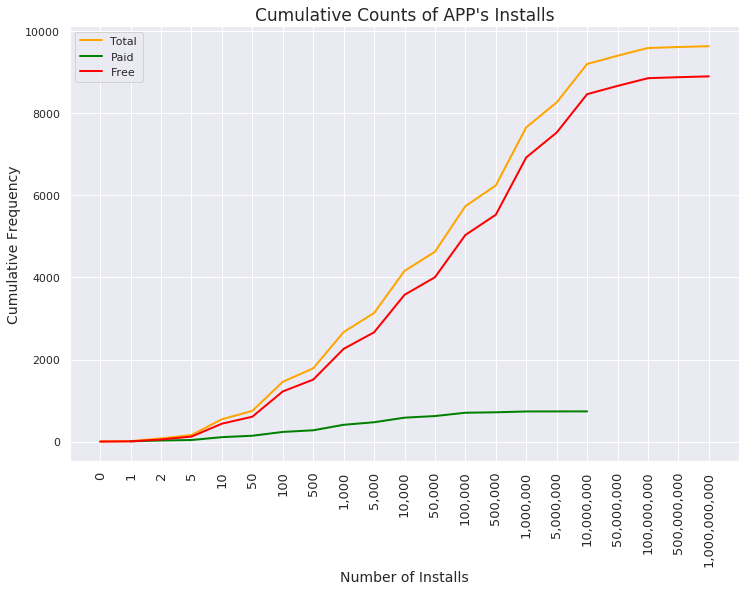

In [71]:
#plot the cumulative counts of intalls
sns.set_style('dark')
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.lineplot(x="Install", y="CumFreq", linewidth = '2', color = 'orange', data=installs_cum, label = 'Total')
ax = sns.lineplot(x="Install", y="CumFreq", linewidth = '2', color = 'green', data=installs_cum_paid, label = 'Paid')
ax = sns.lineplot(x="Install", y="CumFreq", linewidth = '2', color = 'red', data=installs_cum_free, label = 'Free')

bars = ['0', '1', '2', '5', '10', '50', '100', 
         '500', '1,000', '5,000', '10,000', '50,000', 
         '100,000', '500,000', '1,000,000', '5,000,000', 
         '10,000,000', '50,000,000', '100,000,000', '500,000,000', 
         '1,000,000,000']

y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars, rotation=90, fontsize='13', horizontalalignment='center')
plt.title("Cumulative Counts of APP's Installs", fontsize = '17')
plt.ylabel('Cumulative Frequency',fontsize = '14')
plt.xlabel('Number of Installs',fontsize = '14')
ax.grid(b=True, which='major')

plt.show()

* This graph tells us how many apps have achieved a specified number of installs. **It turns out that it is quite difficult for an app to grow users after it has been downloaded over 10M times**.

In [72]:
#draw a boxplot map to observe app's install counts (log-scale) among different categories
f, ax = plt.subplots(figsize=(17, 13))
sns.boxplot(x="Installs_Num", y="Category", data=df,palette="vlag",order = df['Category'].value_counts().index)
plt.title("Boxplot of Intalls Counts (Log-Scale) by Category", fontsize = '17')
plt.ylabel('Category',fontsize = '14')
plt.xlabel('Number of Installs (Log-Scale)',fontsize = '14')

Text(0.5,0,'Number of Installs (Log-Scale)')

In [73]:
#count how many entertainment apps there are
df[df.Category == 'ENTERTAINMENT'].shape[0]

102

* Most apps had been downloaded for **1 thousand to 1 Million times**.
* **Apps in Entertainment category seem to be very popular**, which are the ones most likely to be downloaded. Apps in this category are mostly providing TV streaming services. All 102 entertainment apps from the dataset have been downloaded for **more than 10,000 times**.
* People are a little bit less interested in downloading apps in event, business and medical category.



In [74]:
#Check out the app with no installs
df[df.Installs_Num == 0]

App Category     ...       Installs_Num  Reviews_Log
9148  Command & Conquer: Rivals   FAMILY     ...                  0          0.0

[1 rows x 13 columns]

**2.1.7 EDA - Variance by Category - App's Size (Mb)**

In [75]:
#draw a boxplot map to observe app's size among different categories
f, ax = plt.subplots(figsize=(17, 13))
sns.boxplot(x="Size", y="Category", data=df,palette="vlag",order = df['Category'].value_counts().index)
plt.title("Boxplot of App's Size by Category", fontsize = '17')
plt.ylabel('Category',fontsize = '14')
plt.xlabel('Size',fontsize = '14')

Text(0.5,0,'Size')

* **Game apps** shows the **biggest variation in sizes** which is self-explanatory. Itself and family apps are **more likely to have bigger size** compared to apps in other categories.
* **Tool and libary apps** are more likely to have **comparaly smaller size **but not in a very noticeable scale.

**2.1.8 EDA - Variance by Category - App's Name Word Counts**

Text(0.5,0,'Number of Words')

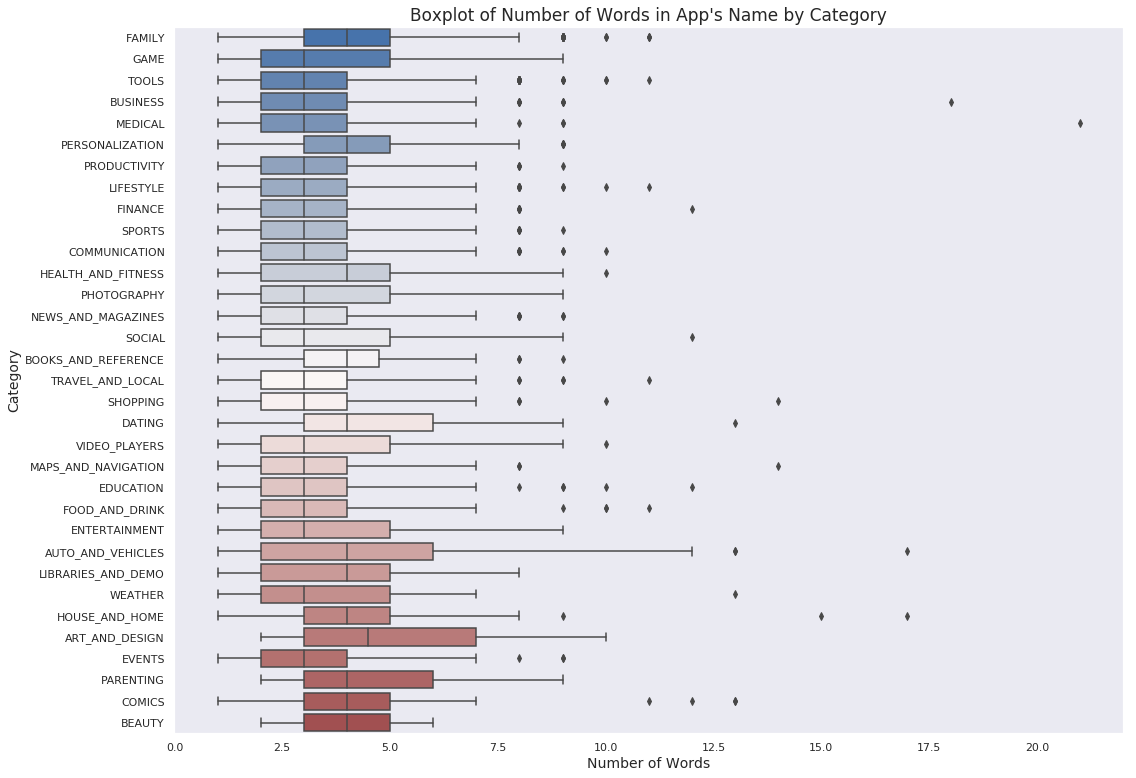

In [76]:
#draw a boxplot map to observe app's word counts among different categories
f, ax = plt.subplots(figsize=(17, 13))
sns.boxplot(x="Name_Word_Counts", y="Category", data=df,palette="vlag",order = df['Category'].value_counts().index)

plt.title("Boxplot of Number of Words in App's Name by Category", fontsize = '17')
plt.ylabel('Category',fontsize = '14')
plt.xlabel('Number of Words',fontsize = '14')

* Most apps like to name themselves with **3 words**.
* **Apps in automobile, dating and art&design category** are more likely to have **longer names** than others.

In [77]:
#display the apps with more than 10 words in their names but with less than 50 reviews. 
#check if there's any outliners
df[(df.Name_Word_Counts > 10) & (df.Reviews < 2)]

App     ...     Reviews_Log
2466  Traditional Chinese Medicine Fangfang Liangfan...     ...        0.693147
5835  25 Mins Ako ay may lobo Etc Pinoy Kid Song Off...     ...        0.000000

[2 rows x 13 columns]

There are two apps having very few reviews and installs so I decided to remove them.

In [78]:
#remove the two outliners
df = df[(df.Name_Word_Counts <= 10) | ((df.Name_Word_Counts > 10) & (df.Reviews >= 2))]

In [79]:
#check out the number of records
df.shape

(9637, 13)

**2.1.8 EDA - Variance by Category - Number of Characters in an App's Name**

Text(0.5,0,'Number of Characters (including spaces & symbols)')

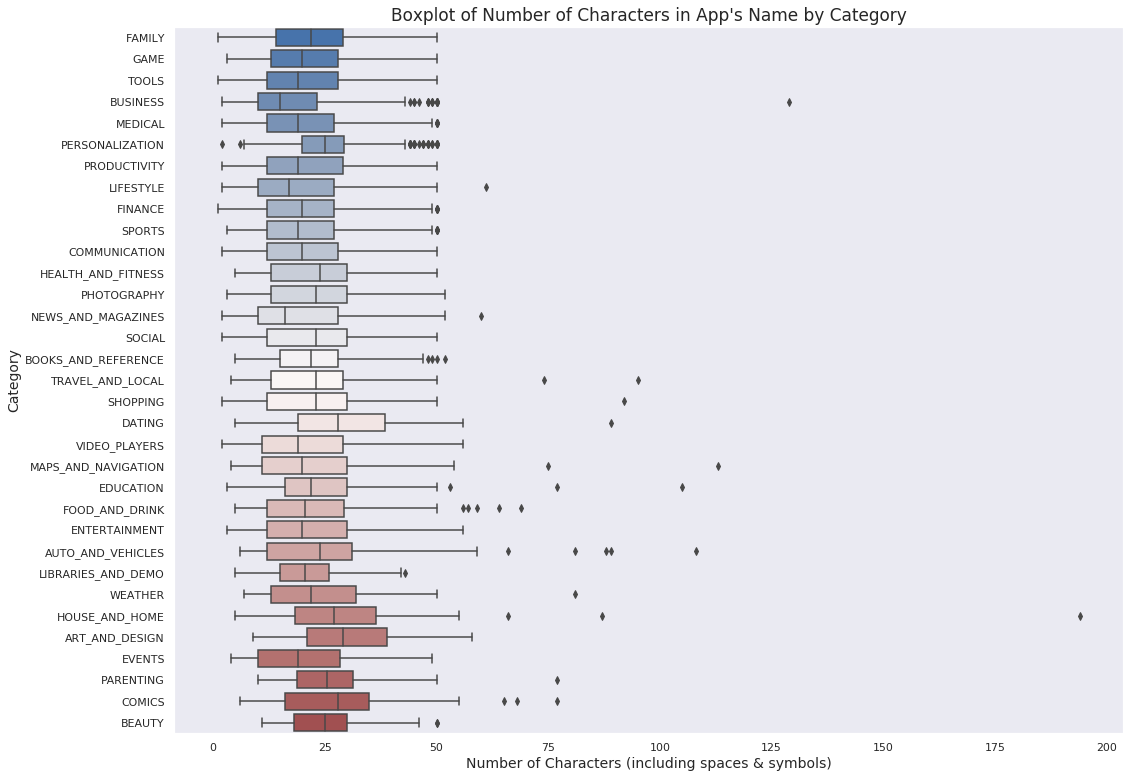

In [80]:
#draw a boxplot map to observe app's character counts among different categories
f, ax = plt.subplots(figsize=(17, 13))
sns.boxplot(x="Name_Length", y="Category", data=df,palette="vlag",order = df['Category'].value_counts().index)

plt.title("Boxplot of Number of Characters in App's Name by Category", fontsize = '17')
plt.ylabel('Category',fontsize = '14')
plt.xlabel('Number of Characters (including spaces & symbols)',fontsize = '14')

* Most apps have similar length in names. 

In [81]:
#check out the 3 apps with extremely long names. Nothing looks odd.
df[df.Name_Length > 110]

App     ...     Reviews_Log
220   104 Looking for a job - looking for a job, loo...     ...       11.216673
1451  591 housing transactions - renting houses, mid...     ...       10.125751
3845  Truck Car Navi by Navitime Large size car, tra...     ...        8.211483

[3 rows x 13 columns]

**2.2 EDA - Correlation Analysis**

Text(0.5,1,'Correlation Matrix')

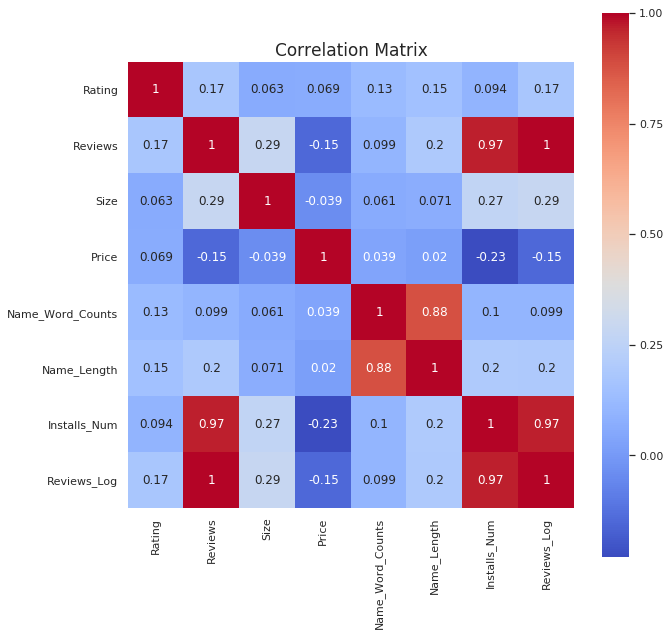

In [82]:
#draw a heatmaps showing correlation among all numerical variables
#I chose the spearman correlation method so that the correlation value won't change under any scaling transformation
f, ax = plt.subplots(figsize=(10, 10))
corr = df.corr(method='spearman')
sns.heatmap(corr, cmap="coolwarm",
            square=True, ax=ax,annot=True)
plt.title("Correlation Matrix", fontsize = '17')

Text(0.5,1,'Correlation Matrix (installs>50k)')

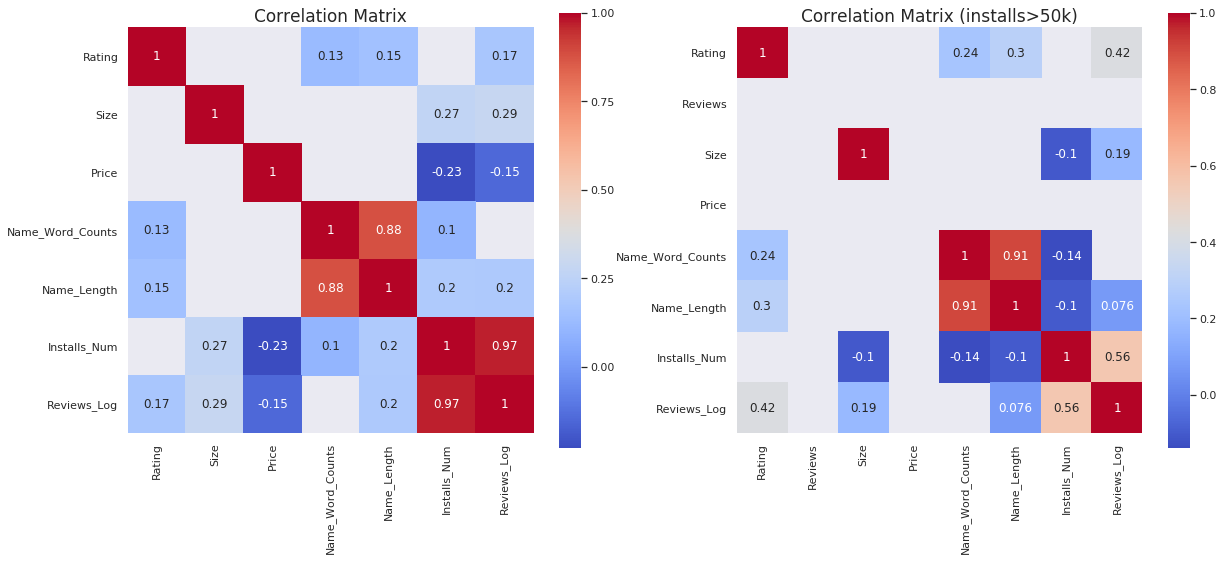

In [83]:
#set a threhold as 0.1 and only display the correlation beyond the bars.
fig = plt.figure(figsize = (20,40))
ax1 = fig.add_subplot(1, 2, 1) # row, column, position
ax2 = fig.add_subplot(1, 2, 2)
corr = df[['Rating','Size','Price','Name_Word_Counts','Name_Length','Installs_Num','Reviews_Log']].corr(method='spearman')

sns.heatmap(corr[abs(corr)>0.1], ax =ax1,cmap="coolwarm",cbar_kws={'shrink': .2},
            square=True,annot=True)
ax1.set_title("Correlation Matrix", fontsize = '17')

corr1 = df[df.Installs_Num>=17].corr(method='spearman')
sns.heatmap(corr1[abs(corr)>0.1], ax = ax2, cmap="coolwarm",cbar_kws={'shrink': .2},
            square=True, annot=True)
ax2.set_title("Correlation Matrix (installs>50k)", fontsize = '17')

* Number of reviews (log-scaled) is **strongly correlated** with the number of intalls (log-scaled) which is self-explanatory.
* Besides, app's size and name's length is **moderately positive correlated** with the number of intalls. App's price is **moderately negative corelated** with the number of intalls
* Length of app's name is **slightly positive correlated** with the app's rating.
* Apps's rating is **slightly positive correlated** with the app's rating.
* Number of Intalls **becomes moderately negative correlative** to app's size, word counts and name's length **when an app achieve more than 10M installs**.  At the same time, price and number of reviews are not factors affecting number of installs since the app has established self-explanatory good reputation and brand image.


In [84]:
#plot a table showing correlation among all numerical variables
#cmap = "coolwarm"
#corr.style.background_gradient(cmap, axis=1)

In [85]:
#check out the correlation matrix for data set with more than x intalls.
#f, ax = plt.subplots(figsize=(10, 10))
#corr1 = df[df.Installs_Num>10].corr(method='spearman')
#ax1 = sns.heatmap(corr1[abs(corr)>0.1], cmap="coolwarm",
#            square=True, ax=ax,annot=True)
#ax1.set_title("Correlation Matrix", fontsize = '17')

**2.3 EDA - Interesting Questions**

* Q1. Within the same category, does app with bigger size discourage people to download them? Or it applies for apps in certain category?
* Q2. If there's a threshold, how many reviews, or how high  the rating it has to be to make someone to download a paid app in a certain category?
* Q3. What genres of game/family app are most popular in the perspective both developers and users?
* Q4. What genres of game/family app are more likely to have bigger size?

**Q1. Within the same category, does app with bigger size discourage people to download them? Or it applies for apps in certain category? How does size affects ratings**

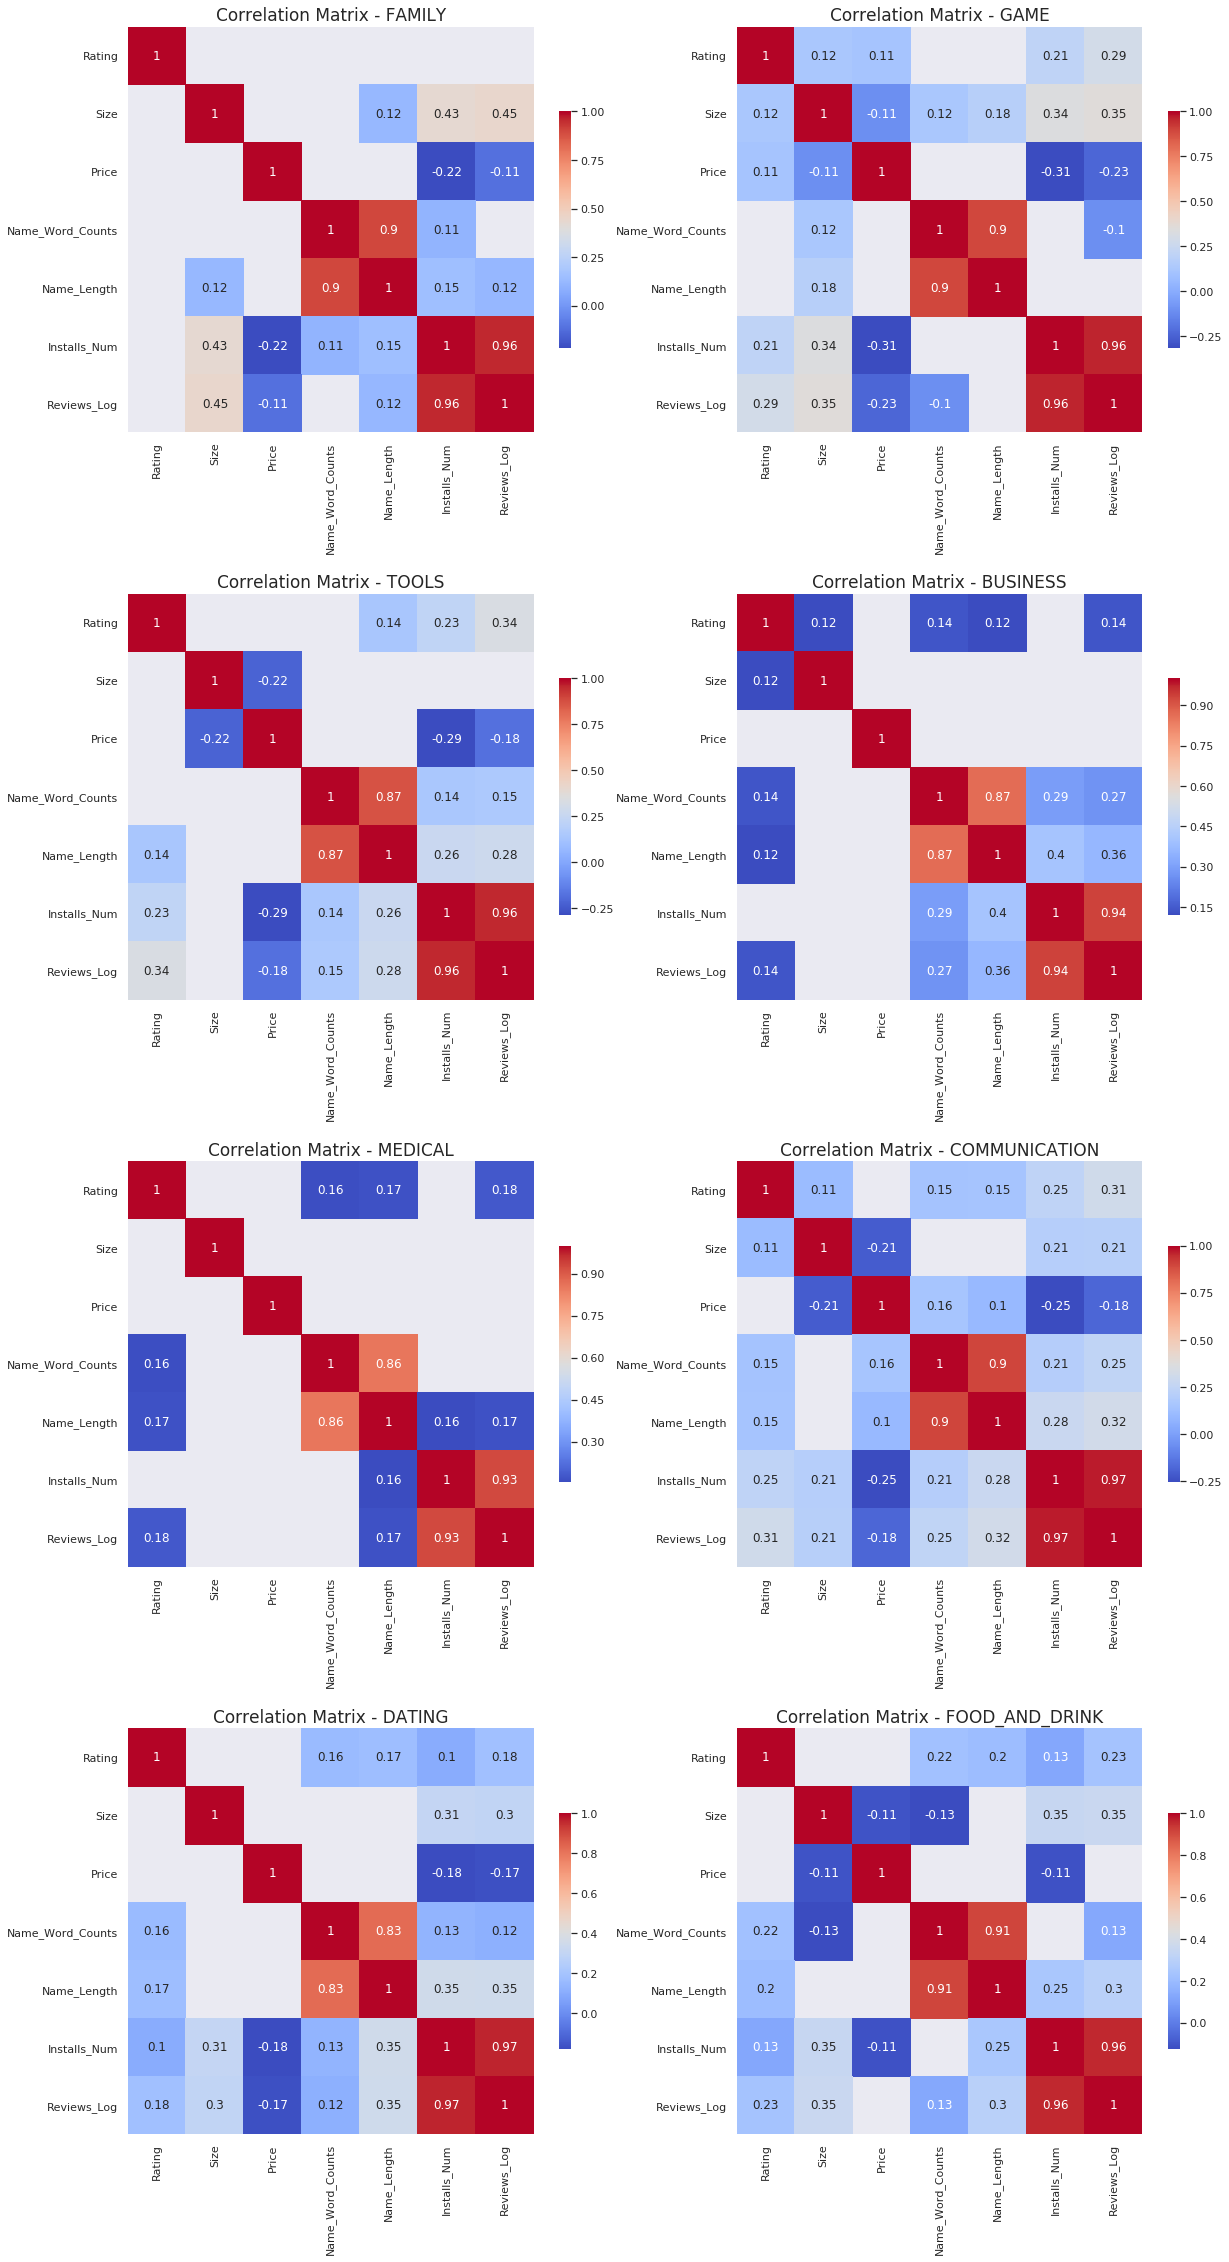

In [86]:
#plotting the correlation matrix for mapps in 8 categories.
fig = plt.figure(figsize = (20,40))
CAT = ['FAMILY', 'GAME','TOOLS','BUSINESS','MEDICAL','COMMUNICATION','DATING','FOOD_AND_DRINK']
df_corr_Install = pd.DataFrame(corr.Installs_Num)
df_corr_Reviews = pd.DataFrame(corr.Reviews_Log)
df_corr_Rating = pd.DataFrame(corr.Rating)
for i in range(8):
    ax = fig.add_subplot(4, 2, i+1)
    corr = df[df['Category'] == CAT[i]][['Rating','Size','Price','Name_Word_Counts','Name_Length','Installs_Num','Reviews_Log']].corr(method='spearman')
    sns.heatmap(corr[abs(corr)>0.1], ax =ax,cmap="coolwarm",cbar_kws={'shrink': .5},square=True,annot=True)
    ax.set_title("Correlation Matrix - " + CAT[i], fontsize = '17')
    df_corr_Install[CAT[i]] = corr.Installs_Num
    df_corr_Reviews[CAT[i]] = corr.Reviews_Log
    df_corr_Rating[CAT[i]] = corr.Rating
del df_corr_Install['Installs_Num']
del df_corr_Reviews['Reviews_Log']
del df_corr_Rating['Rating']

In [87]:
#correlation table in terms of Number of Installs
df_corr_Install.style.background_gradient('coolwarm', axis=1)

* Number of Installs is more sentitive (positive correlated) with changes in rating for **Communication apps**.
* **The bigger the app size, the more downloads will achieve for Family, game and food&drink apps**. It might be explained by the better quality came with a bigger size app and the storage of smart phone get improved constantly. On the other hand, people care less about the size for Tools, Business and Medical apps.
* **People are more adversed to download expensive gaming apps** compared to business and medical apps.
* **Business, communication and dating apps with longer names acheive more installs** which is the opposite in terms of gaming apps.
* Since number of reviews are highly correlated with number of downloads, I don't observe any special correlation between these two factors across different categories.

In [88]:
#correlation table in terms of Rating
df_corr_Rating.style.background_gradient('coolwarm', axis=1)

* **The length of app's name is slightly negatively affecting gaming app's ratings**, which is moderatively positive correlative to food&drink apps.
* The Rating of game, tools and comunication apps are more sensitive (positively) to their number of installs and reviews.

*** Q2. If there's a threshold, how many reviews, or how high  the rating it has to be to make someone to download a paid app in a certain category?**


In [90]:
df_paid = df[df.Type == 'Paid']

In [91]:
df_paid['Category'].value_counts()

FAMILY                 179
GAME                    82
MEDICAL                 82
PERSONALIZATION         81
TOOLS                   78
BOOKS_AND_REFERENCE     28
PRODUCTIVITY            27
COMMUNICATION           27
SPORTS                  24
PHOTOGRAPHY             19
HEALTH_AND_FITNESS      15
LIFESTYLE               13
TRAVEL_AND_LOCAL        12
BUSINESS                12
FINANCE                 10
WEATHER                  8
DATING                   6
MAPS_AND_NAVIGATION      5
EDUCATION                4
VIDEO_PLAYERS            4
AUTO_AND_VEHICLES        3
ART_AND_DESIGN           3
SOCIAL                   3
PARENTING                2
FOOD_AND_DRINK           2
SHOPPING                 2
NEWS_AND_MAGAZINES       2
ENTERTAINMENT            2
LIBRARIES_AND_DEMO       1
Name: Category, dtype: int64

Text(0.5,0,'Number of Paid Apps')

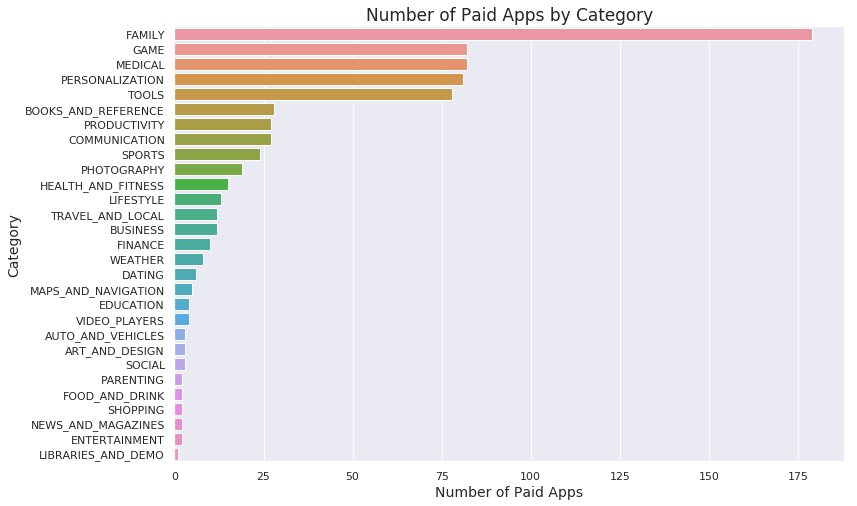

In [92]:
#draw a histogram showing number of paid apps per category
sns.set_style('whitegrid')
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(y=df_paid['Category'],order = df_paid['Category'].value_counts().index)
plt.title("Number of Paid Apps by Category", fontsize = '17')
plt.ylabel('Category',fontsize = '14')
plt.xlabel('Number of Paid Apps',fontsize = '14')

* I will ignore the category with less 10 paid apps when I do the analysis as the sample size is too small.

In [93]:
list_paid = df_paid['Category'].value_counts()>=10
list_paid

FAMILY                  True
GAME                    True
MEDICAL                 True
PERSONALIZATION         True
TOOLS                   True
BOOKS_AND_REFERENCE     True
PRODUCTIVITY            True
COMMUNICATION           True
SPORTS                  True
PHOTOGRAPHY             True
HEALTH_AND_FITNESS      True
LIFESTYLE               True
TRAVEL_AND_LOCAL        True
BUSINESS                True
FINANCE                 True
WEATHER                False
DATING                 False
MAPS_AND_NAVIGATION    False
EDUCATION              False
VIDEO_PLAYERS          False
AUTO_AND_VEHICLES      False
ART_AND_DESIGN         False
SOCIAL                 False
PARENTING              False
FOOD_AND_DRINK         False
SHOPPING               False
NEWS_AND_MAGAZINES     False
ENTERTAINMENT          False
LIBRARIES_AND_DEMO     False
Name: Category, dtype: bool

In [94]:
#create a list for category with more than 10 paid apps
list_paid = ['FAMILY', 'GAME', 'MEDICAL', 'PERSONALIZATION', 'TOOLS',
       'BOOKS_AND_REFERENCE', 'COMMUNICATION', 'PRODUCTIVITY', 'SPORTS',
       'PHOTOGRAPHY', 'HEALTH_AND_FITNESS', 'LIFESTYLE', 'BUSINESS',
       'TRAVEL_AND_LOCAL', 'FINANCE']

In [95]:
df_price = df[df['Category'].isin(list_paid)]

In [96]:
#remove catogories with less than 10 paid apps
df_paid = df_paid[df_paid['Category'].isin(list_paid)]
df_free = df[df.Type == 'Free']

In [97]:
#build correlation table for paid and free apps
df_paid_Install = pd.DataFrame(corr.Installs_Num)
for i in range(15):
    corr_paid = df_paid[df_paid['Category'] == list_paid[i]][['Rating','Size','Price','Name_Word_Counts','Name_Length','Installs_Num','Reviews_Log',]].corr(method='spearman')
    df_paid_Install[list_paid[i]] = corr_paid.Installs_Num
del df_paid_Install['Installs_Num']
df_paid_Install = df_paid_Install.T
del df_paid_Install['Installs_Num']

df_free_Install = pd.DataFrame(corr.Installs_Num)
for i in range(15):
    corr_free = df_free[df_free['Category'] == list_paid[i]][['Rating','Size','Price','Name_Word_Counts','Name_Length','Installs_Num','Reviews_Log',]].corr(method='spearman')
    df_free_Install[list_paid[i]] = corr_free.Installs_Num
del df_free_Install['Installs_Num']
df_free_Install = df_free_Install.T
del df_free_Install['Installs_Num']
del df_free_Install['Price']

In [98]:
df_paid_Install.style.background_gradient('coolwarm', axis=1)

* **This Table shows us the correlation between number of installs and other factors, including app's rating and sizes, across different categories for paid apps.**
* As usual, it's noted that number of installs is highly correlated with number of reviews. However, I observed that** people care less about number of reviews when they download paid apps in book&reference or lifestype category**
*** Non-free lifestyle, business and finance apps with longer names** are more likely gain more installs.
* People turn to be less likely to download expensive apps in books&reference, photography, health&fitness and finance category.
* **The bigger the app's size, the more downloads can be acheived for paid gaming, sports and photography apps**, which can be expensive by the more sophisticated design and better quality came with the app. On the other hand, for apps in travel&local and finance category, they got less downloads when the size is too big.
* People ask for higher rating when they download non-free apps in productivity, photography, health&fitness, business, travel&local and finance categories.

* ** Q3. What genres of game/family app are most popular in the perspective both developers and users?**

Text(0.5,0,'Number of Family/Game Apps')

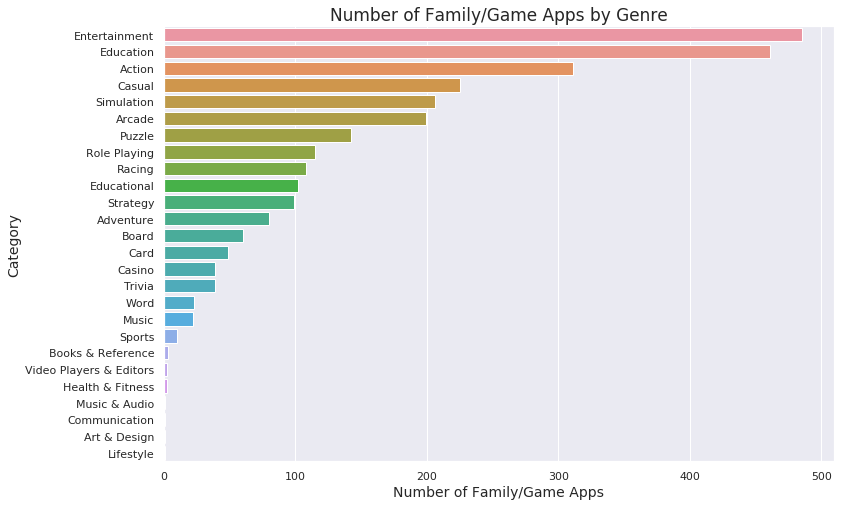

In [99]:
#draw a histogram showing number of paid apps per category
sns.set_style('whitegrid')
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(12,8))
df_game= df[(df.Category == 'GAME') | (df.Category == 'FAMILY')]
ax = sns.countplot(y=df_game['Genres'],order = df_game['Genres'].value_counts().index)
plt.title("Number of Family/Game Apps by Genre", fontsize = '17')
plt.ylabel('Category',fontsize = '14')
plt.xlabel('Number of Family/Game Apps',fontsize = '14')

In [100]:
df_game.Installs_Num.mean()

11.692749461593683

Text(0.5,0,'Number of Installs (Log-Scale)')

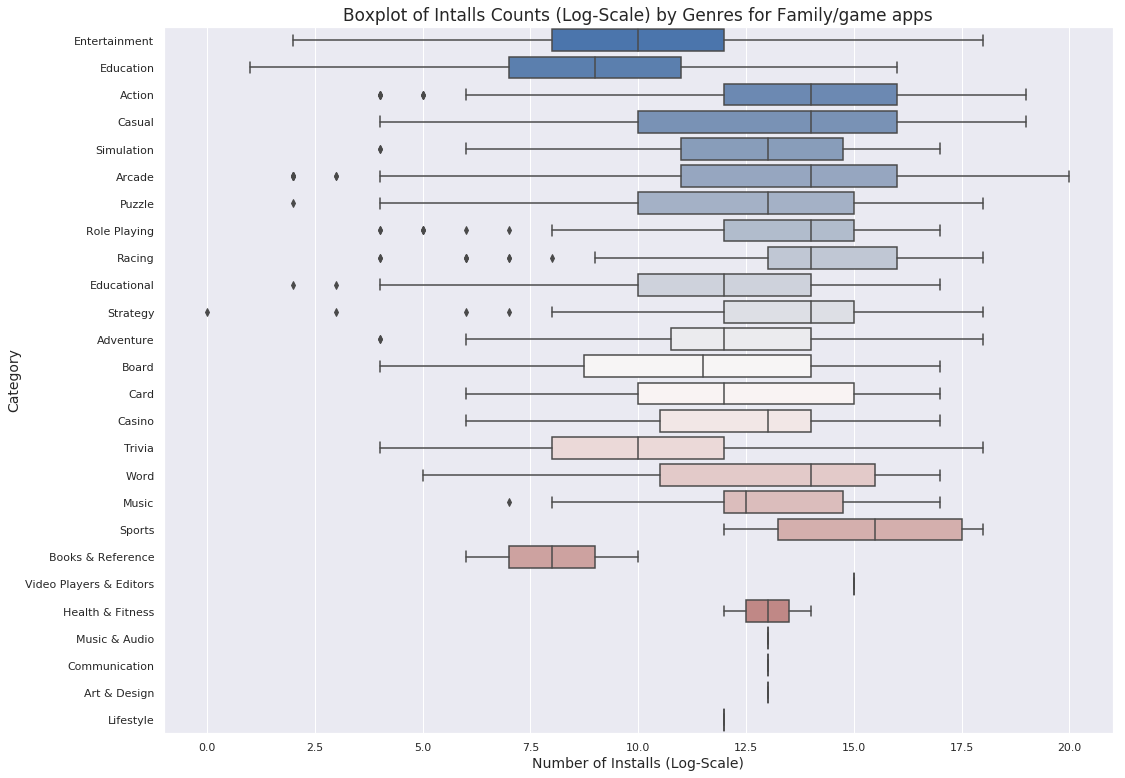

In [101]:
#draw a boxplot map to observe family/game app's install counts (log-scale) among different genres
f, ax = plt.subplots(figsize=(17, 13))
sns.boxplot(x="Installs_Num", y="Genres", data=df_game,palette="vlag",order = df_game['Genres'].value_counts().index)
plt.title("Boxplot of Intalls Counts (Log-Scale) by Genres for Family/game apps", fontsize = '17')
plt.ylabel('Category',fontsize = '14')
plt.xlabel('Number of Installs (Log-Scale)',fontsize = '14')

* The top five popular app genres in terms of game developers are Entertainment, Education, Action, Casual and Simulation. Among these five genres, it's notes that **Action, casual Simulation games are more popular in terms of users**
* On the other hand, it's noted **gaming apps in Casino, World, Music, Sports and Book&Reference genres has achevied better than average download counts but they are less available in google play store**, which gives game developers insights regarding unexploited user markets.

*** Q4. What genres of game/family app are more likely to have bigger size?**

Text(0.5,0,'Size')

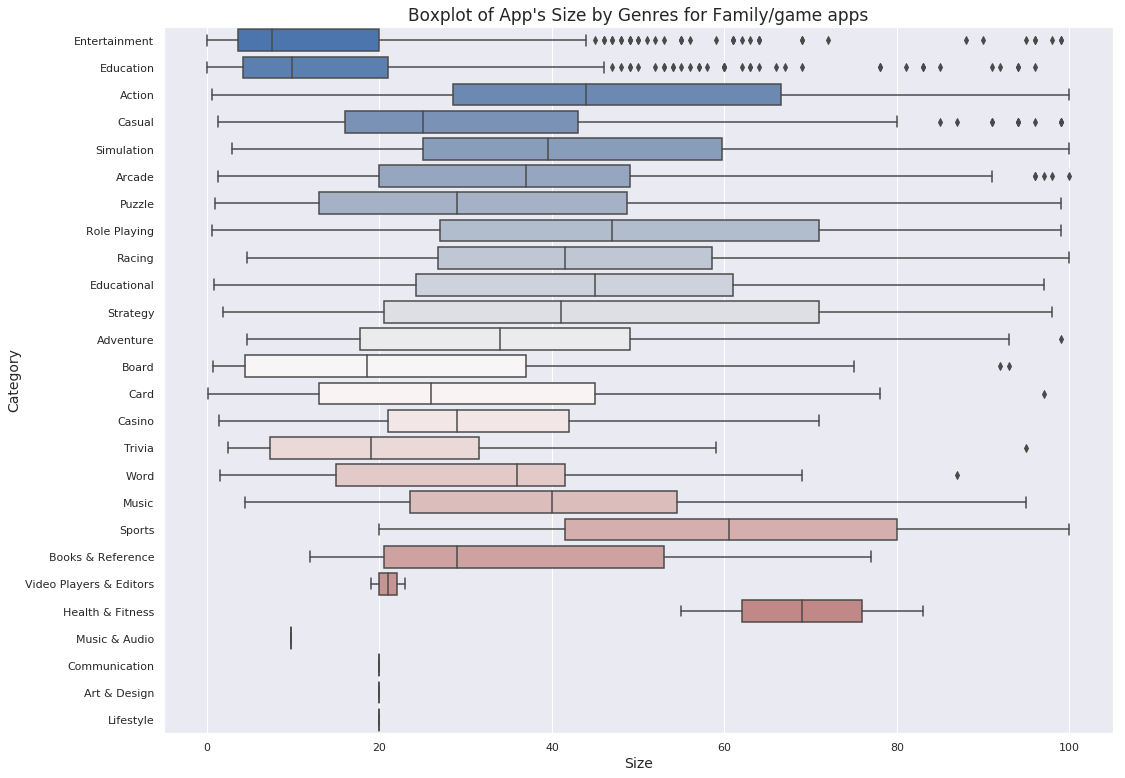

In [102]:
#draw a boxplot map to observe family/game app's size among different genres
f, ax = plt.subplots(figsize=(17, 13))
sns.boxplot(x="Size", y="Genres", data=df_game,palette="vlag",order = df_game['Genres'].value_counts().index)
plt.title("Boxplot of App's Size by Genres for Family/game apps", fontsize = '17')
plt.ylabel('Category',fontsize = '14')
plt.xlabel('Size',fontsize = '14')

In [103]:
df_game.Size.mean()

31.9367432166413

* It is noted that **entainment and education type gaming app are more likely have smaller size** which explains why developers like to make them most.
* On the other hand, we have seen** a positive correlation between number of downloads and app's size**, which can be explained by better quality and more sophisticated design came with the bigger size.

**2.4 EDA - Conclusion**

1. ** General Statistics**
    * **Family, Game, Tool, Business** are the top 4 categories regarding Google Play Store Apps.
    * **Most apps** have ratings rangeing from 4.0 - 4.5 out of 5.
    * Most apps had been downloaded for **1 thousand to 1 Million times**.
    * Most developers like to name their apps with **3 words**.

1. ** Talking about the app pricing**
    * **Medical apps** are more likely to charge people with a **wider range in prices**, which can goes from **0.99 to 79.99 dollars**. It shows people have a **high willingness to pay** recarding healthcare products
    * **Finance and Business apps** also charges people with a **wide range in prices** but in a more structual way, came with **less outliners**. It shows Finance and Business app organizers are **more caucious** in setting app price or they may lose repulation for charging insanely high price.
    * **Personalization apps** are more likely to charge money.
    * It's interesting to see that **all Beauty Apps are free**, and there are only 53 of them. It may because there are too many free comestic channel on Youtube and it doesn't have that big app market compare to others.
    * People turn out to be less likely to download expensive apps in gaming, books&reference, photography, health&fitness and finance category..
1. ** Talking about Number of Reviews**
    * People are **more willing to give comments** for **entertainment apps**. Apps in this category are mostly providing TV streaming services and probably many users actually are leaving comments for movie or TV show plots rather than experience when using the app. 
    * On the contrary, **business and medical apps received less reviews**, which corresponds to the unpopularity regarding their installing counts.

1. ** Talking about Number of Installs**
    * **It turns out that it is quite difficult for an app to grow users after it has been downloaded over 10M times**.
    * **Apps in Entertainment category seem to be very popular**, which are the ones most likely to be downloaded. Apps in this category are mostly providing TV streaming services. All 102 entertainment apps from the dataset have been downloaded for **more than 10,000 times**.
    * People are less interested in downloading apps in event, business and medical category.

1. ** Talking about App's Size**
    * **Game apps** shows the **biggest variation in sizes** which is self-explanatory. Itself and family apps are **more likely to have bigger size** compared to apps in other categories.
    * **Tool and libary apps** are more likely to have **comparaly smaller size **but in a very unnoticeable scale.
    * **The bigger the app's size, the more downloads can be acheived for paid gaming, sports and photography apps**, which can be explained by the more sophisticated design and better quality came with the apps.
 
1.  ** Talking about App's name**
    * **Apps in automobile, dating and art&design category** are more likely to have **longer names** than others.

1. ** Talking about Correlation**
    * Number of reviews (log-scaled) is **strongly correlated** with the number of intalls (log-scaled) which is self-explanatory.
    * Besides, app's size and name's length is **moderately positive correlated** with the number of installs. 
    * App's price is **moderately negative corelated** with the number of installs
    * Number of Installs **becomes moderately negative correlative** to app's size and name's length **when an app achieve more than 10M installs**.  
    * Number of Installs is more sentitive (positive correlated) with changes in rating for **Communication apps**.
    * **The Rating of game, tools and comunication apps** are more sensitive (positively) to their number of installs and reviews.
1.  **Talking about Gaming Apps**
    * **The top five popular app genres in terms of game developers are Entertainment, Education, Action, Casual and Simulation**. Among these five genres, it's notes that **Action, casual Simulation games are more popular in terms of users**
    * On the other hand, it's noted **gaming apps in Casino, World, Music, Sports and Book&Reference genres has achevied better than average download counts but they are less available in google play store**, which gives game developers insights regarding unexploited user markets.
    

In [104]:
#df_paid_Install.style.background_gradient('coolwarm', axis=1)

In [105]:
#df_free_Install.style.background_gradient('coolwarm', axis=1)

** Modeling Proposal**
* Since I've observed totally different correlation patterm between paid and free apps, I am interested to build a classfification model to determine whether a developer can make a paid app and acheive considerable downloads with given parameters, including app's category, name's length, size and rating.
* Before doing so, I would like to build a regression model to predict the number of downloads based on all other app's parameters.

In [106]:
df.to_csv('GooglePlayStoreApp_EDA.csv')
df_price.to_csv('GooglePlayStoreApp_EDA_PaidvsFree.csv')